In [1]:
import os
import time
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import rcParams
from torchvision import transforms
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
from skimage import exposure, filters, util


/home/w22038792/anaconda3/envs/sol/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


**DataLoader**

In [24]:
from dataset import create_loaders
data_directory = "/home/w22038792/Documents/Bern/GAN_data/"


train_loader, test_loader = create_loaders(data_directory,test_percent=0.2, batch_size=1, 
            sdo_channels=['304', '171'], iris_channel='1400')

norm_iris_ims, norm_sdo_ims, iris_ims, sdo_ims = next(iter(train_loader))
print(iris_ims.shape, sdo_ims.shape)

430.0 423.63259217498023 436.36740782501977
7.25 1.4311340332031248 13.068865966796874
tensor(1.4311)
tensor(13.0689)
tensor(423.6326)
tensor(436.3674)
tensor(1.) tensor(0.)
torch.Size([1, 1, 777, 716]) torch.Size([1, 1, 471, 449])


tensor([0])


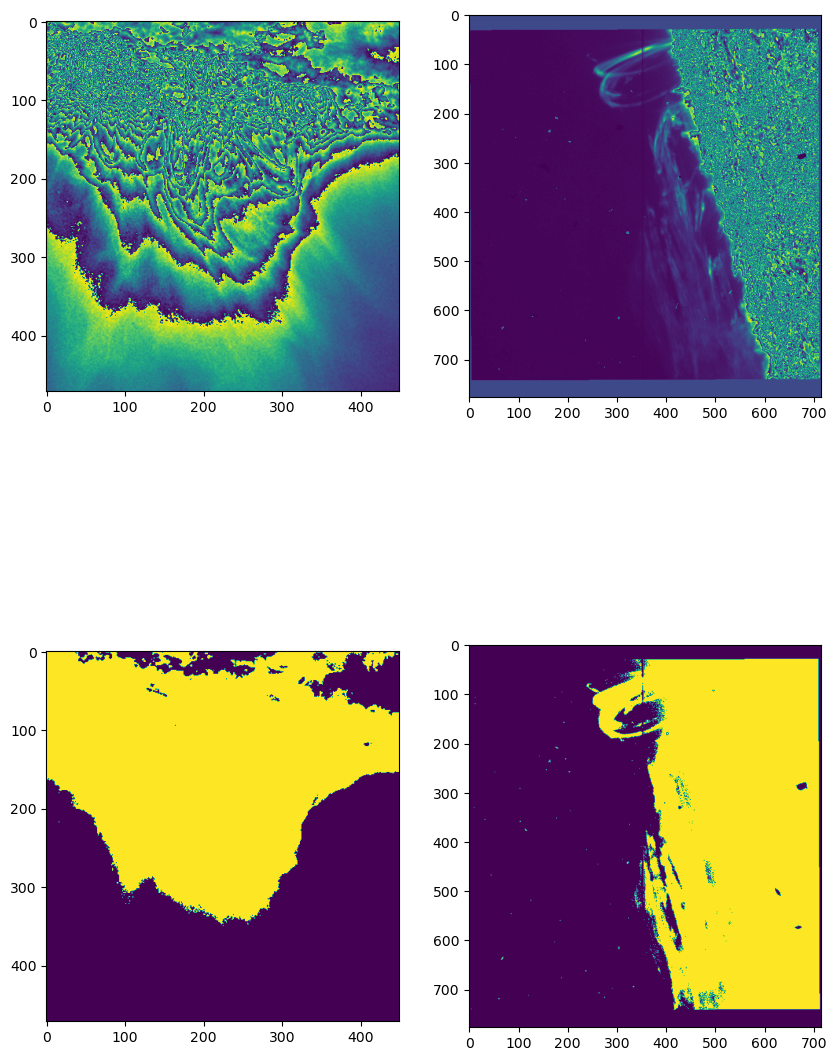

In [25]:
_, ax = plt.subplots(2, 2, figsize=(10, 15))
indices = torch.randperm(len(sdo_ims))[:1]
#indices = torch.tensor([45,8,27,28])
print(indices)
for i, samples in enumerate(zip(sdo_ims[indices], iris_ims[indices],norm_sdo_ims[indices], norm_iris_ims[indices])):
    aia = (((samples[0][0]).numpy()).astype(np.uint8))
    iris = (((samples[1][0]).numpy()).astype(np.uint8))
    norm_aia = (((samples[2][0]).numpy()).astype(np.uint8))
    norm_iris = (((samples[3][0]).numpy()).astype(np.uint8))
    ax[0,0].imshow(aia)
    ax[0,1].imshow(iris)
    ax[1,0].imshow(norm_aia)
    ax[1,1].imshow(norm_iris)
plt.show()

In [5]:
# Time test for single epoch load
start = time.time()
for ir, sd in train_loader:
    pass
end = time.time()
print(np.round(end - start, 2), 'seconds for single epoch load')

5.0 4.5195341291791244 5.4804658708208756
2.25 -4.593440246582031 9.09344024658203
tensor(-4.5934)
tensor(9.0934)
tensor(4.5195)
tensor(5.4805)
tensor(1.) tensor(0.)


ValueError: too many values to unpack (expected 2)

TypeError: Invalid shape (1016,) for image data

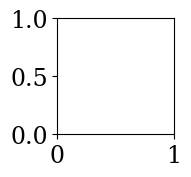

In [3]:
from utils import quick_look_gen

quick_look_gen(iris_ims, dim=8, savename=None)
quick_look_gen(sdo_ims, dim=8, savename=None)

In [ ]:
x_dims = []
y_dims = []
for path in train_iris_paths:
    try:data = np.load(path)
    except: continue
    x_dims.append(data.shape[0])
    y_dims.append(data.shape[1])
for path in train_sdo_paths:
    try:data = np.load(path)
    except: continue
    x_dims.append(data.shape[0])
    y_dims.append(data.shape[1])
for path in test_iris_paths:
    try:data = np.load(path)
    except: continue
    x_dims.append(data.shape[0])
    y_dims.append(data.shape[1])
for path in test_sdo_paths:
    try:data = np.load(path)
    except: continue
    x_dims.append(data.shape[0])
    y_dims.append(data.shape[1])
# FInd max dims
max(x_dims), max(y_dims)

In [ ]:
x_dims = []
y_dims = []
for path in train_iris_paths:
    try:data = np.load(path)
    except: continue
    x_dims.append(data.shape[0])
    y_dims.append(data.shape[1])
for path in train_sdo_paths:
    try:data = np.load(path)
    except: continue
    x_dims.append(data.shape[0])
    y_dims.append(data.shape[1])
for path in test_iris_paths:
    try:data = np.load(path)
    except: continue
    x_dims.append(data.shape[0])
    y_dims.append(data.shape[1])
for path in test_sdo_paths:
    try:data = np.load(path)
    except: continue
    x_dims.append(data.shape[0])
    y_dims.append(data.shape[1])
# FInd mean dims
int(np.mean(x_dims)), int(np.mean(y_dims))

In [1]:
import torch
from brandons_files.generator import Generator as Generator1
from generator_2 import Generator as Generator2

In [2]:
input = torch.randn(1, 1, 250, 500)
model1 = Generator1()
output = model1(input)
print(output.shape)

torch.Size([1, 1, 252, 500])


In [4]:
input = torch.randn(1, 1, 350, 500)
model2 = Generator2(input.shape, 9)
output2 = model2(input)
print(output2.shape)

torch.Size([350, 500]) what the hek
torch.Size([1, 1, 350, 500])
